<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Exploring SVMs Using Sklearn


---

In [1]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, linear_model, datasets
from sklearn.model_selection import cross_val_score

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### 1. Load the handwritten digits dataset.

In [95]:
digits = datasets.load_digits()
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

1797
64


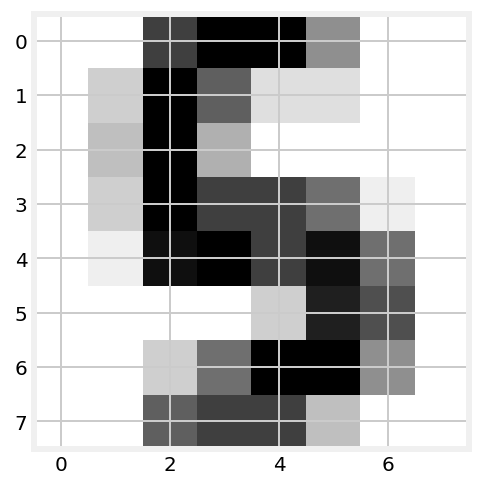

In [96]:
print(len(digits.data))      # 1,797 observations
print(len(digits.data[0]))   # 8 x 8 pixel image

# the number 9
plt.imshow(digits.images[-21], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [97]:
digits.target[-21]

5

In [105]:
np.unique(digits.target)
X,y=digits.data,digits.target

### 2. Cross-validate a logistic regression on the data.

In [138]:
# A:
cross_val_score(LogisticRegression(),X,y,cv=5).mean()

0.9210188113360701

### 3. Cross-validate a SVM on the data.

Hint: Check what is the default kernel used. Try some of the alternatives.

In [139]:
clf = svm.SVC(kernel='linear')
cross_val_score(clf,X,y,cv=5).mean()

0.9493348726211526

In [140]:
# A:
clf = svm.SVC(kernel='poly')
cross_val_score(clf,X,y,cv=5).mean()

0.9699354903506467

## Gaussian SVM has two parameters, gamma and C

---

### gamma

Intuitively, the gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. 

The higher the value of gamma, the more it will try to exactly fit the training data set. That will cause over-fitting problems.
- Small gamma: The model is constrained and can under-fit!  It has high bias and low variance.
- Large gamma: The model tries to capture the shape too well: it can over-fit!  It has low bias and high variance.



### C

`C` is the penalty parameter of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly. `C` can be thought of as the parameter for the soft margin cost function, which controls the influence of each individual support vector.

- Small C: makes the decision surface smooth and simple, a softer margin can under-fit! Gives high bias and low variance.
- Large C: selects more support vectors: can over-fit! Gives a harder margin, low bias and high variance.

### 4. Fit an SVM modifying the default gamma and C.

In [141]:
# A:
clf = svm.SVC(kernel='rbf',C=2,degree=5,gamma=0.001)
cross_val_score(clf,X,y,cv=5).mean()

0.9733124099078996

### 5. Gridsearch an optimal gamma with C=1.

In [163]:
# A:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
clf=svm.SVC(kernel='rbf',C=1)
param={'gamma':np.logspace(-5,5,50)}
grid=GridSearchCV(clf,param)
grid.fit(X,y)
grid.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0010985411419875584,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [164]:
cross_val_score(grid.best_estimator_,X,y,cv=5).mean()

0.9727520652646042

### 6. Gridsearch the optimal C, gamma, and kernel.

In [158]:
# A:
clf=svm.SVC(kernel='rbf')
param={'C':np.logspace(-5,4,5),
       'gamma':np.logspace(-5,1,5),
       'kernel':['linear','poly','rbf']}
grid=GridSearchCV(clf,param)
grid.fit(X,y)
grid.best_estimator_

SVC(C=56.23413251903491, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.00031622776601683794,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [159]:
cross_val_score(grid.best_estimator_,X,y,cv=5).mean()

0.9738386115854933

### 7. Import the iris dataset.

In [280]:
import pandas as pd
iris = datasets.load_iris()
iris_X = pd.DataFrame(iris.data[:, :2],columns=iris.feature_names[:2])  # we only take the first two features. 
iris_y = iris.target
iris=iris_X.copy()
iris['target']=iris_y
iris.head()

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


### 8. Cross-validate a default logistic regression and default SVM on the iris data.

In [281]:
# A:
from sklearn.svm import SVC
lm=LogisticRegression()
svm=SVC()

print('Logistic Regression:',cross_val_score(lm,iris_X,iris_y,cv=5).mean())
print('SVM                :',cross_val_score(svm,iris_X,iris_y,cv=5).mean())

Logistic Regression: 0.7666666666666667
SVM                : 0.82


### 9. [Bonus] Compare three SVMs with different kernels on the iris data visually.
- Gaussian
- Linear
- Poly of degree 3

Hint: For visual comparison, use only two of the iris features, e.g. sepal length and sepal width.

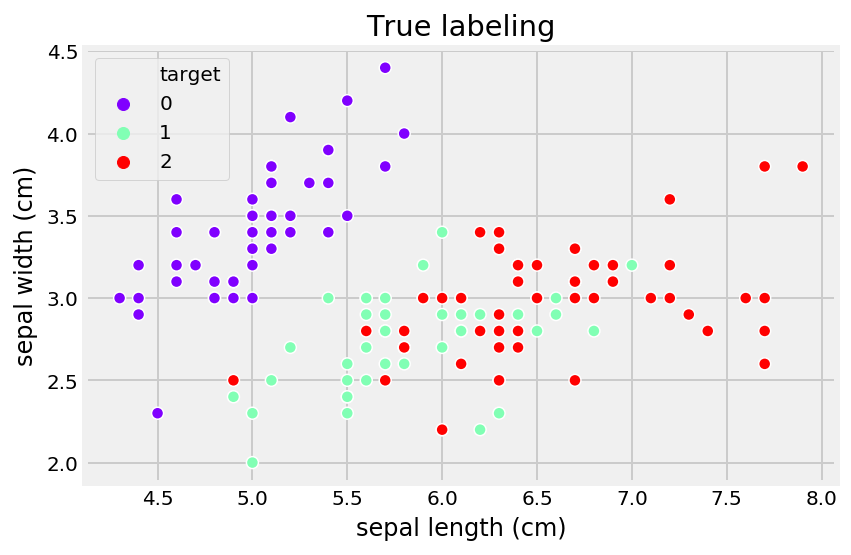

In [282]:
# A:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.scatterplot(data=iris,x='sepal length (cm)',y='sepal width (cm)',hue='target',palette='rainbow');
plt.title('True labeling');

Gaussian accuracy: 0.82


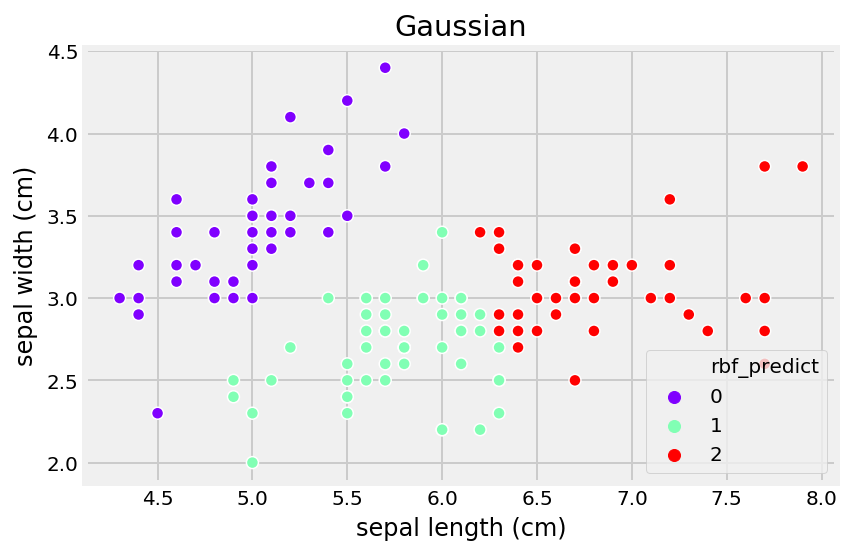

In [283]:
svm=SVC(kernel='rbf')
svm.fit(iris_X,iris_y)
iris['rbf_predict']=svm.predict(iris_X)

sns.scatterplot(data=iris,x='sepal length (cm)',y='sepal width (cm)',hue='rbf_predict',palette='rainbow');
plt.title('Gaussian');
print('Gaussian accuracy:',cross_val_score(svm,iris_X,iris_y,cv=5).mean())

Linear accuracy: 0.8066666666666666


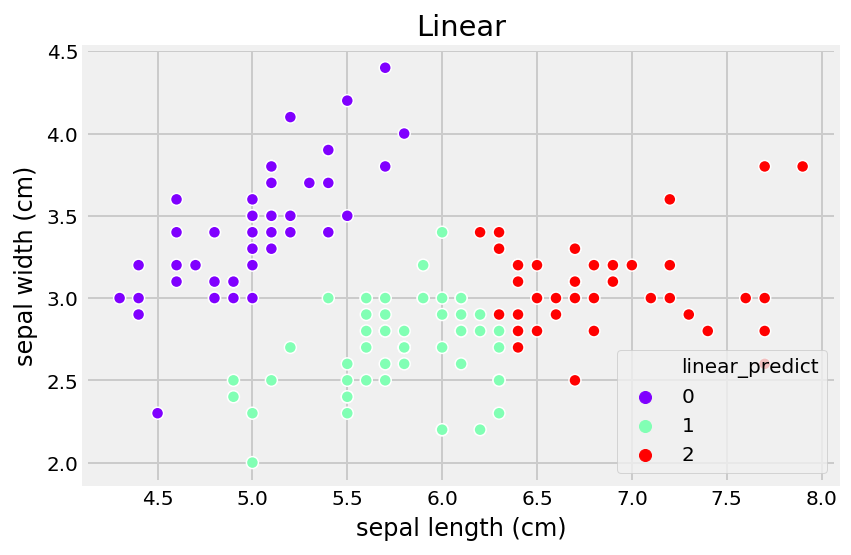

In [284]:
svm=SVC(kernel='linear')
svm.fit(iris_X,iris_y)
iris['linear_predict']=svm.predict(iris_X)

sns.scatterplot(data=iris,x='sepal length (cm)',y='sepal width (cm)',hue='linear_predict',palette='rainbow');
plt.title('Linear');
print('Linear accuracy:',cross_val_score(svm,iris_X,iris_y,cv=5).mean())

Poly accuracy: 0.8133333333333332


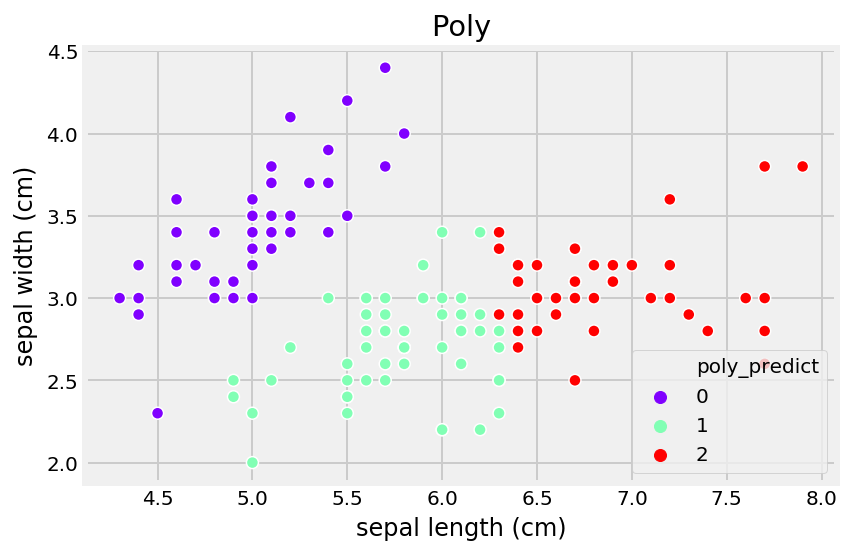

In [285]:
svm=SVC(kernel='poly',degree=3)
svm.fit(iris_X,iris_y)
iris['poly_predict']=svm.predict(iris_X)

sns.scatterplot(data=iris,x='sepal length (cm)',y='sepal width (cm)',hue='poly_predict',palette='rainbow');
plt.title('Poly');
print('Poly accuracy:',cross_val_score(svm,iris_X,iris_y,cv=5).mean())

### 10. [Bonus] Compare SVM kernels visually on generated data using sklearn's `make_circles`.

Load `make_circles` from here:
```python
from sklearn.datasets import make_circles
```

Compare the linear, rbf, and poly kernels.

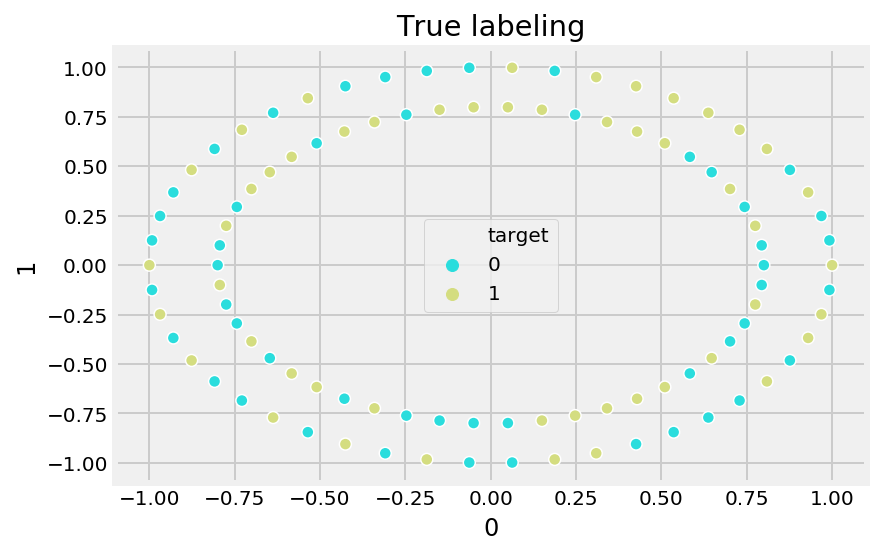

In [286]:
# A:
from sklearn.datasets import make_circles
df=pd.DataFrame(make_circles()[0])
target=make_circles()[1]
df['target']=target
sns.scatterplot(data=df,x=0,y=1,hue='target',palette='rainbow');
plt.title('True labeling');

Gaussian accuracy: 0.52


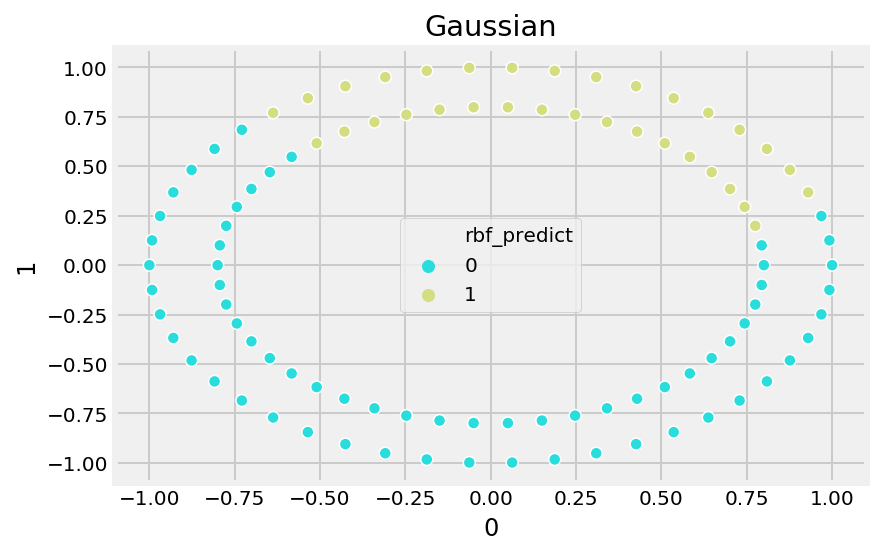

In [287]:
svm=SVC(kernel='rbf')
svm.fit(df.drop('target',axis=1),df.target)
df['rbf_predict']=svm.predict(df.drop('target',axis=1))

sns.scatterplot(data=df,x=0,y=1,hue='rbf_predict',palette='rainbow');
plt.title('Gaussian');
print('Gaussian accuracy:',cross_val_score(svm,df.drop('target',axis=1),df.target,cv=5).mean())

Linear accuracy: 0.4800000000000001


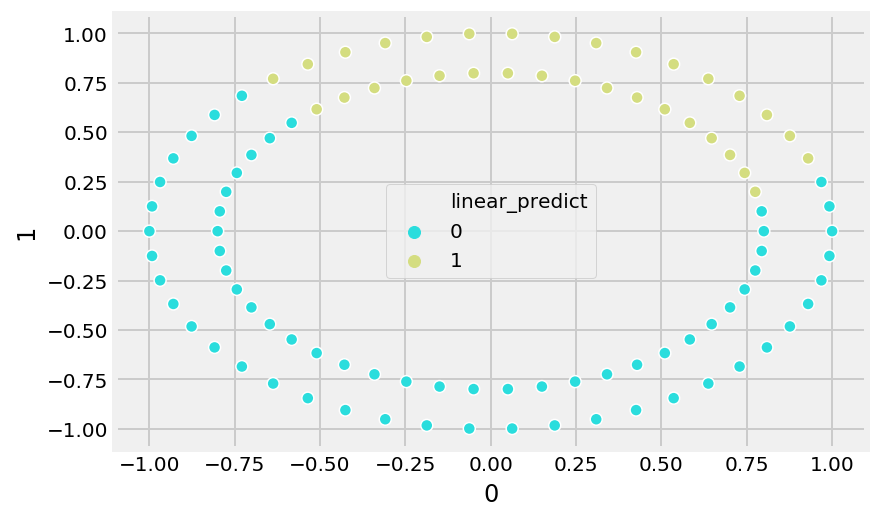

In [288]:
svm=SVC(kernel='linear')
svm.fit(df.drop('target',axis=1),df.target)
df['linear_predict']=svm.predict(df.drop('target',axis=1))

sns.scatterplot(data=df,x=0,y=1,hue='linear_predict',palette='rainbow');
plt.title('');
print('Linear accuracy:',cross_val_score(svm,df.drop('target',axis=1),df.target,cv=5).mean())

Poly accuracy: 0.58


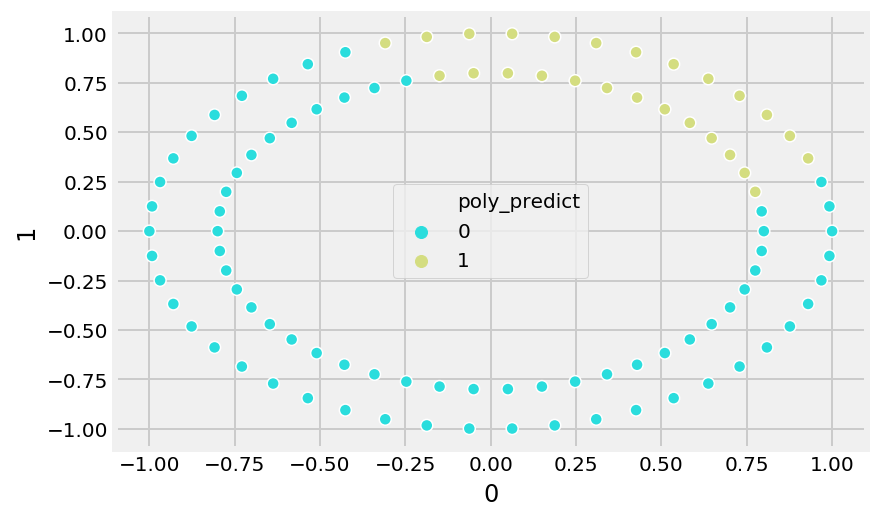

In [289]:
svm=SVC(kernel='poly')
svm.fit(df.drop('target',axis=1),df.target)
df['poly_predict']=svm.predict(df.drop('target',axis=1))

sns.scatterplot(data=df,x=0,y=1,hue='poly_predict',palette='rainbow');
plt.title('');
print('Poly accuracy:',cross_val_score(svm,df.drop('target',axis=1),df.target,cv=5).mean())